## Задача № 2 Оценка параметра $\mu$ для возмущенной модели автомобиля

Для имеющейся динамической модели алгоритм решения состоит из следующих этапов:

1. Инициализировать динамическую модель, выбрав из некоторого допустимого диапазона значений параметр $\mu$ и некоторое произвольное ненулевое управление.
2. Возмутить (использовалось равномерное распределение) параметры динамической модели (масса, длинна, параметры покрышки) на 10 %. 
3. Для полученной динамической модели и исходного заданного управления решать задачу поиска параметров $\hat{\mu}$ и $\overline{\mu}$ алгоритмом кросс-энтропии. 
4. Сравнить полученные $\hat{\mu}$ и $\overline{\mu}$ с заданным при инициализации $\mu$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

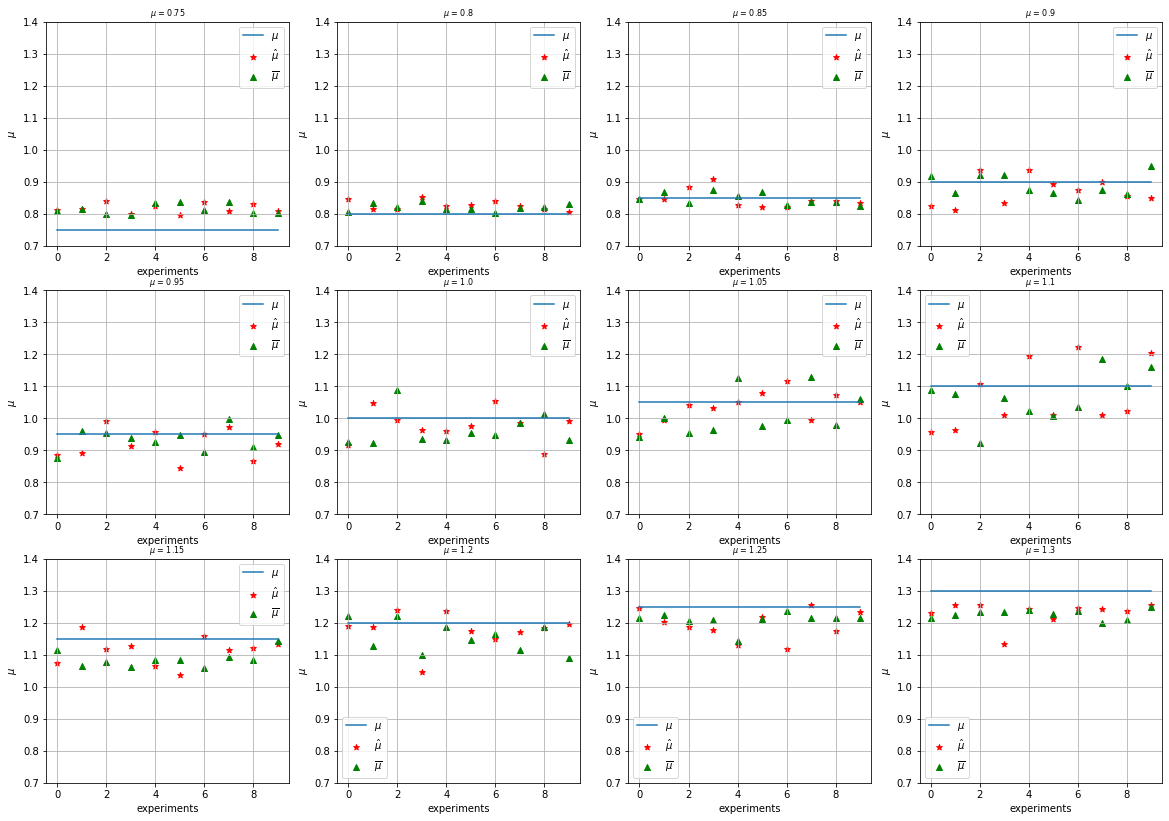

In [24]:
mu_results = np.load('Problem2_results.npy')
mu_results_new = np.load('Problem2_results_new.npy')

plt.figure(figsize=(20, 14))
k_session = 12
k_point = 10
for i in range(k_session):
    plt.subplot(3, 4, i+1)
    plt.plot(range(k_point), np.ones(k_point)*(0.75 + 0.05*i), label = '$\mu$')
    plt.ylim(0.7, 1.4)
    plt.ylabel('$\mu$')
    plt.xlabel('experiments')
    plt.scatter(range(k_point), mu_results[i], c='Red', marker='*', label = '$\hat{\mu}$')
    plt.scatter(range(k_point), mu_results_new[i], c='Green', marker='^', label = '$\overline{\mu}$')
    plt.legend()
    plt.title(f'$\mu$ = {0.75 + 0.05*i}', fontsize=8)
    plt.grid()
    
plt.savefig('problem2.png')

In [23]:
N = 12
results_mean = []
results_mean_new = []
index = []
errors_mean = []
errors_mean_new = []

for i in range(N):
    results_mean.append(np.mean(mu_results[i]))
    results_mean_new.append(np.mean(mu_results_new[i]))
    index.append(f'$\mu$ = {0.75 + i*0.05}')
    errors_mean.append(((0.75 + i*0.05)/np.mean(mu_results[i]) - 1)*100)
    errors_mean_new.append(((0.75 + i*0.05)/np.mean(mu_results_new[i]) - 1)*100)
    
df = pd.DataFrame({'mean': results_mean,
                  'mean_new': results_mean_new,
                  'error_mean, %': errors_mean,
                  'error_mean_new, %': errors_mean_new},
                  index=index)

df.T

,$\mu$ = 0.75,$\mu$ = 0.8,$\mu$ = 0.85,$\mu$ = 0.9,$\mu$ = 0.95,$\mu$ = 1.0,$\mu$ = 1.05,$\mu$ = 1.1,$\mu$ = 1.15,$\mu$ = 1.2,$\mu$ = 1.25,$\mu$ = 1.3
mean,0.817244,0.825740,0.846528,0.871215,0.919358,0.977799,1.038565,1.070524,1.114022,1.178425,1.194850,1.231373
mean_new,0.813912,0.819661,0.846805,0.889289,0.935474,0.963329,1.012369,1.065989,1.087263,1.156439,1.209684,1.227338
"error_mean, %",-8.228115,-3.117167,0.410182,3.304022,3.332929,2.270526,1.101011,2.753466,3.229513,1.830868,4.615666,5.573204
"error_mean_new, %",-7.852396,-2.398649,0.377275,1.204389,1.552804,3.806642,3.717168,3.190557,5.770167,3.766838,3.332760,5.920296
